<a href="https://colab.research.google.com/github/MahletTesfaye/EDA-analysis/blob/main/EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
data = sns.load_dataset("titanic")

In [237]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [239]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [240]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [241]:
data['survived'].unique()

array([0, 1])

In [242]:
#Clean the data check if their are null values in the data
data.isnull()
data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [243]:
print("Threshhold:",len(data)*0.5)
print("Not null values in deck column:", data["deck"].notna().sum())
print("Null values in deck column:", data["deck"].isna().sum())

Threshhold: 445.5
Not null values in deck column: 203
Null values in deck column: 688


In [244]:
#if we have many null values
threshold = len(data) * 0.5 # Drop columns with fewer than 50% non-null values (at least 50% of the data must not be null)--- the threshold is about the non-null values
data_cleaned = data.dropna(axis=1, thresh=threshold) # In this case deck column has dropped as it has less than 50% non null values.
data_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [245]:
# Filling missing values for 'age' with median and 'embarked' and 'embark_town' with mode
data_cleaned = data_cleaned.assign(
    age=data_cleaned['age'].fillna(data_cleaned['age'].median()),
    embarked=data_cleaned['embarked'].fillna(data_cleaned['embarked'].mode()[0]),
    embark_town=data_cleaned['embark_town'].fillna(data_cleaned['embark_town'].mode()[0])
)

In [246]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


# Univariate Analysis - Numerical and Categorical Analysis

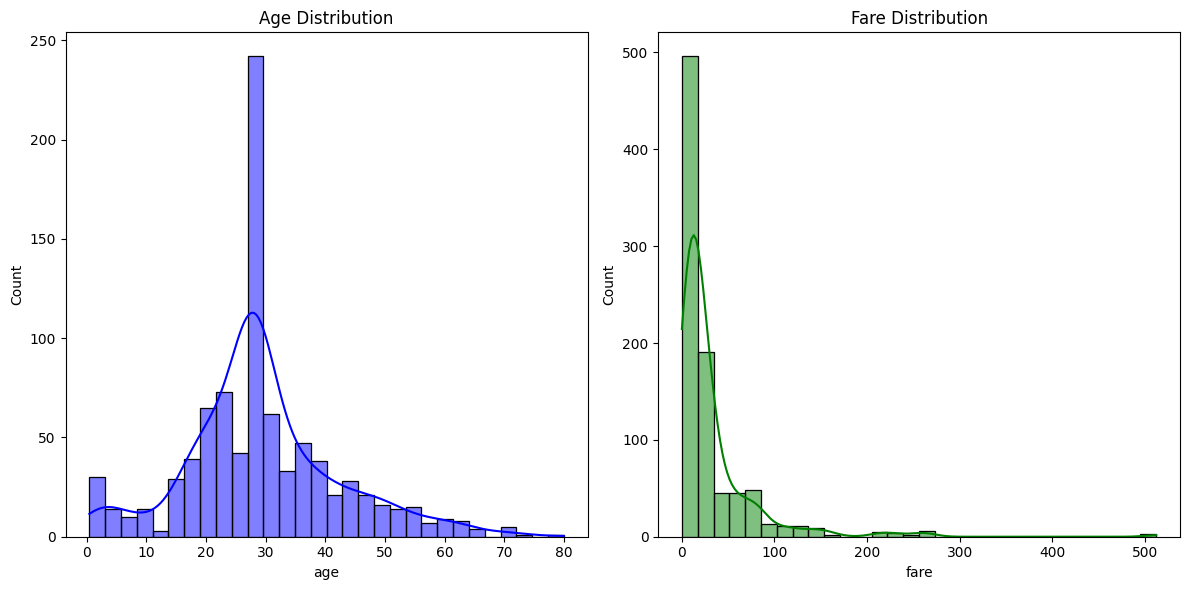

In [247]:
# Visualization - Distribution of numerical variables (age, fare) (Univariant plots)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['fare'], kde=True, bins=30, color='green')
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()

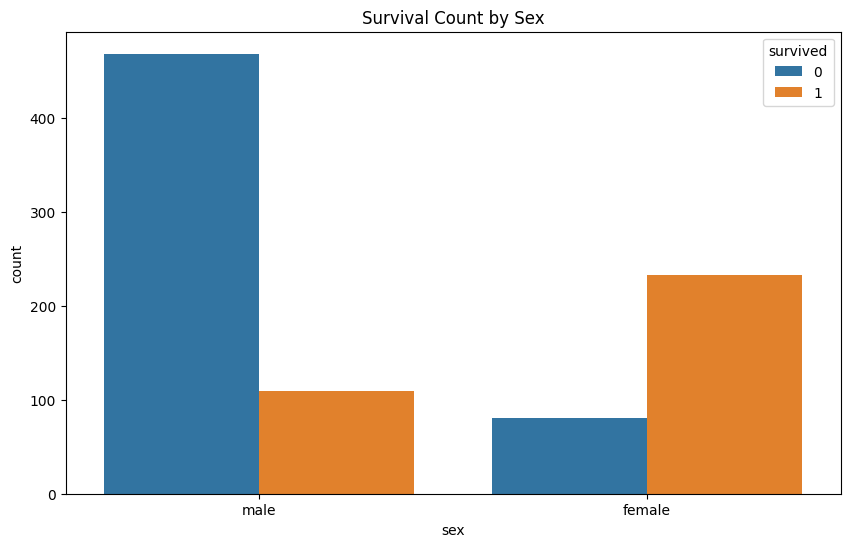

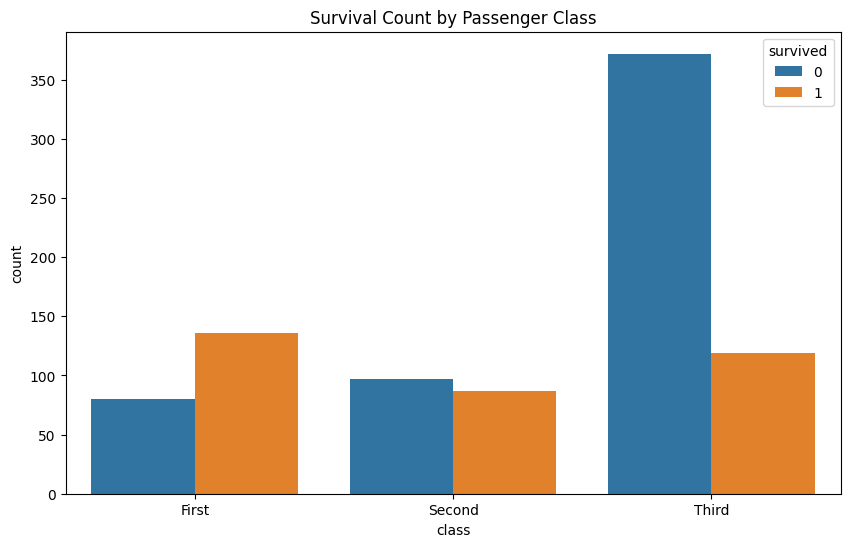

In [248]:
# Categorical analysis - Countplot of sex and class with survival (Univariant plots)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='survived', data=data_cleaned)
plt.title('Survival Count by Sex')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='survived', data=data_cleaned)
plt.title('Survival Count by Passenger Class')
plt.show()

# Bivariate Analysis - Age vs Survival

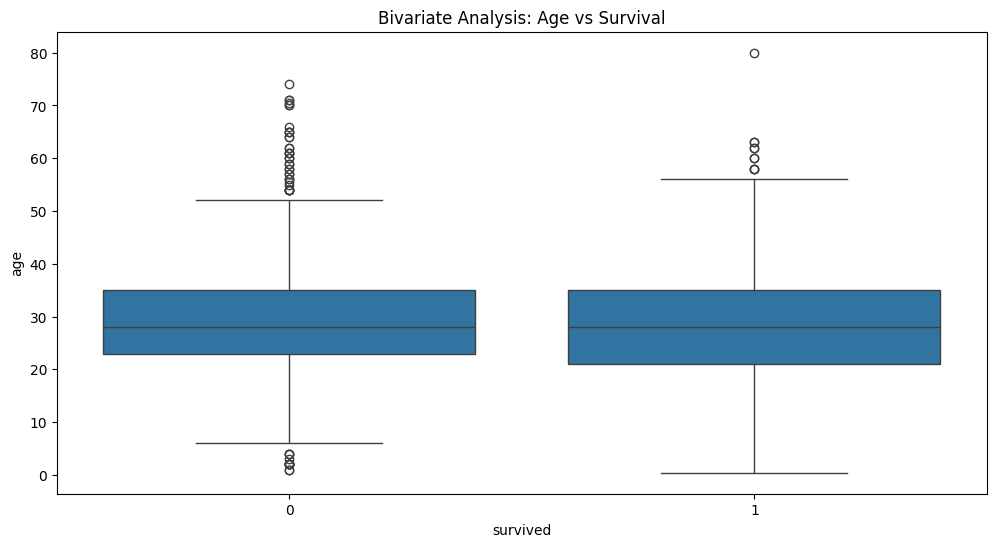

In [249]:
# Bivariate Analysis - Age vs Survival
plt.figure(figsize=(12, 6))
sns.boxplot(x='survived', y='age', data=data_cleaned)
plt.title('Bivariate Analysis: Age vs Survival')
plt.show()

# Multivariate Analysis - Age, Fare, and Survival (Scatterplot)

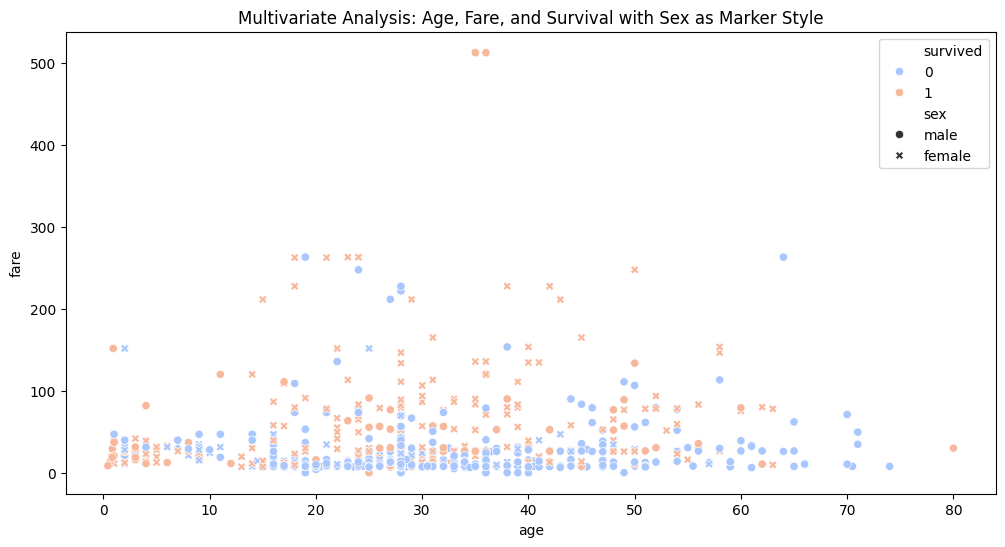

In [250]:
# Multivariate Analysis - Age, Fare, and Survival (Scatterplot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=data_cleaned, palette='coolwarm', style='sex')
plt.title('Multivariate Analysis: Age, Fare, and Survival with Sex as Marker Style')
plt.show()